<a href="https://colab.research.google.com/github/priyadarshi0007/TimeSeries-AIEngineering/blob/master/Time_Series_AUTO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df.head(2)

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89

In [4]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [5]:
df.head(2)

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [8]:
ny_df =df.set_index('timeStamp')

In [10]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [ ]:
pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot()

In [30]:
forecast1 = model.predict(n_periods=8,return_conf_int=True)

In [31]:
forecast1

(array([5322.1181287 , 6205.6042232 , 7187.96523284, 7302.37699853,
        6403.3710953 , 5790.20057687, 5692.7495448 , 5950.52015123]),
 array([[4724.96266345, 5919.27359395],
        [5401.98229229, 7009.22615411],
        [6361.51379546, 8014.41667022],
        [6471.18871067, 8133.56528639],
        [5554.18567053, 7252.55652007],
        [4933.47953863, 6646.92161512],
        [4835.88690208, 6549.61218753],
        [5092.97871732, 6808.06158515]]))

In [32]:
forecast_range = pd.date_range(start='2017-05-31',periods=8,freq='M')

In [33]:
forecast1_df =pd.DataFrame(forecast1[0],index=forecast_range,columns=['Prediction'])

In [34]:
forecast1_df

Prediction
2017-05-31  5322.118129
2017-06-30  6205.604223
2017-07-31  7187.965233
2017-08-31  7302.376999
2017-09-30  6403.371095
2017-10-31  5790.200577
2017-11-30  5692.749545
2017-12-31  5950.520151

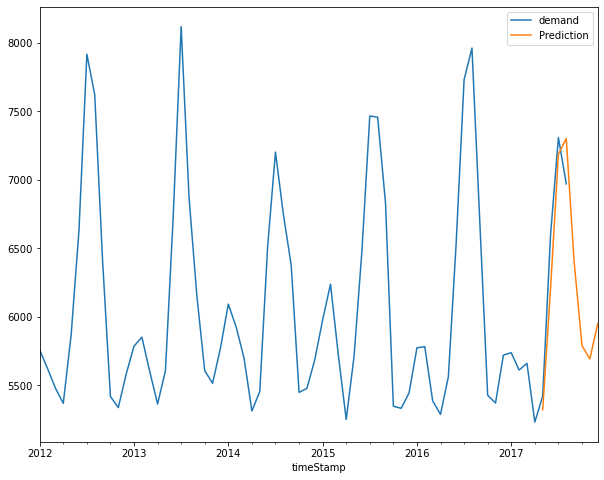

In [35]:
pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot()

In [36]:
#Confidene interval
lower = pd.Series(forecast1[1][:,0],index=forecast_range)
upper = pd.Series(forecast1[1][:,1],index=forecast_range)

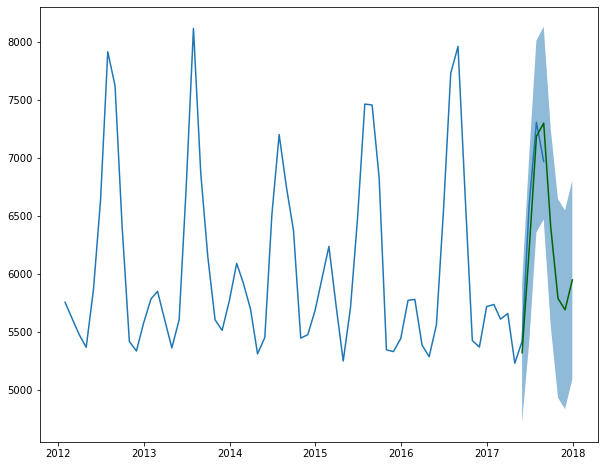

In [37]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df,color='darkgreen')
plt.fill_between(forecast_range,
                  lower,
                  upper,alpha = 1.5)

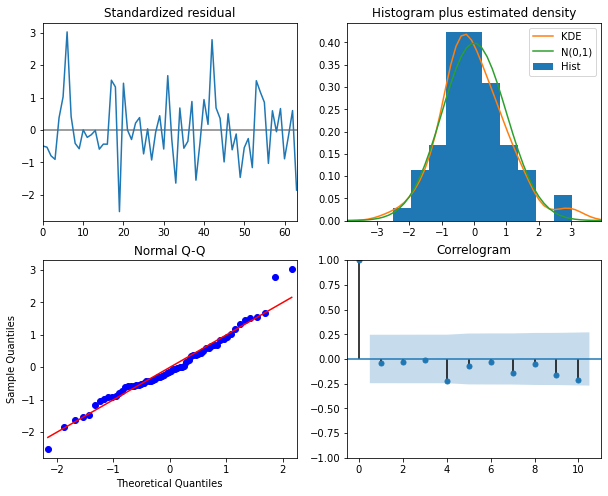

In [38]:
out = model.plot_diagnostics()